
<style>
h1{
  font-size: 20px;
}
</style>

<center><h1>DRUG CLASSIFICATION USING MACHINE LEARNING</h1></center>
<br>
<center><h2>CONTENTS</h2></center>

1. Introduction 
2.Importing Libraries
3. Reading Data Set 
4. Initial Dataset Exploration 

 4.1 Categorical Variables 

 4.2 Descriptive Analysis 

5. Univariate Analysis

 5.1 Drug Type Distribution

 5.2 Gender Distribution 

 5.3 Blood Pressure Distribution 

 5.4 Cholesterol Distribution

 5.5 Gender Distribution based on Drug Type 

 5.6 Blood Pressure Distribution based on Cholesetrol 

 5.7 Sodium to Potassium Distribution based on Gender and Age
6.Bivariate analysis
7.Multivariate Analysis
8.Encoding- Converting categorical to numerical
9.Data Preparation

 9.1 Data Bining

      9.1.1 Age

      9.1.2 Na_to_K 
   9.2 Splitting the dataset 

   9.3 Feature Engineering

10. Model Building 

   10.1 Logistic Regression

   10.2 K-nearest Neighbours

   10.3 Naive Bayes Classifier

   10.4 Decision Tree Making

   10.5 Random Forest Classifier

11. Model Evaluation and comparison
12. Saving the model
13. Conclusion





# 1. Introduction 
<center><img src="https://cdn-aimkf.nitrocdn.com/fHzWlVYOXDdxWdFNbwxEdhdjxmnEjSJH/assets/static/optimized/rev-dadfeca/wp-content/uploads/2019/03/drug-classification-charts.webp" alt="Drug Picture" width="1000" height="600"></center><br>

This dataset contains information about drug classification based on patient general information and its diagnosis. Machine learning model is needed in order **to predict the outcome of the drugs type** that might be suitable for the patient.


**The machine learning models used in this project are:** 
1. Linear Logistic Regression
3. K-nearest Neighbours
4. Naive Bayes Classifier
5. Decision Tree Making
6. Random Forest Classifier

---

## Data Set Description 🧾

 There are **6 variables** in this data set:
*   **4 categorical** variables.
*   **2 continuous** variables.

<br>

<i>The following is the **structure of the data set**.</i>


<table style="width:100%">
<thead>
<tr>
<th style="text-align:center; font-weight: bold; font-size:14px">Variable Name</th>
<th style="text-align:center; font-weight: bold; font-size:14px">Description</th>
<th style="text-align:center; font-weight: bold; font-size:14px">Sample Data</th>
</tr>
</thead>
<tbody>
<tr>
<td><b>Age</b></td>
<td>Patient Age</td>
<td>23; 47; ...</td>
</tr>
<tr>
<td><b>Sex</b></td>
<td>Gender of patient <br> (male or female)</td>
<td>F; M; ...</td>
</tr>
<tr>
<td><b>BP</b></td>
<td>Levels of blood pressure <br> (high, normal, or low)</td>
<td>HIGH; NORMAL; LOW; ...</td>
</tr>
<tr>
<td><b>Cholesterol</b></td>
<td>Levels of cholesterol <br> (high or normal)</td>
<td>1.4; 1.3; ...</td>
</tr>
<tr>
<td><b>Na_to_K</b></td>
<td>Sodium to potassium ratio in blood</td>
<td>25.355; 13.093; ...</td>
</tr>
<tr>
<td><b>Drug</b></td>
<td>Type of drug</td>
<td>DrugY; drugC; ...</td>
</tr>
</tbody>
</table>



# 2. Importing Libraries 📚
**Importing libraries** that will be used in this notebook.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import warnings
import pickle
from scipy import stats
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

# 3. Reading Data Set 
👉 After importing libraries, we will also **import the dataset** that will be used.

In [10]:
df = pd.read_csv("drug200.csv")

👉 Read the first 6 rows in the dataset.

In [11]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


Data type and checking null in dataset.

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB
None


<i>From the results above, **there are no missing/null value** in this dataset.</i>

# 4. Initial Dataset Exploration 
<i>This section will explore raw dataset that has been imported.</i>

## 4.1 Categorical Variables 

In [ ]:
df.Drug.value_counts()

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

<i>It can be seen that from results above, DrugY has more amount than other types of drugs.</i>

In [ ]:
df.Sex.value_counts()

M    104
F     96
Name: Sex, dtype: int64

<i>The distribution of patient gender is balanced.</i>

In [ ]:
df.BP.value_counts()

HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64

<i> The distribution of blood pressure level is balanced.</i>

In [ ]:
df.Cholesterol.value_counts()

HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64

The distribution of cholesterol level is balanced.

## 4.2 Descriptive Analysis 
This section will show the dataset information using describe function. The skewness value for each numerical variables will also shown in this section.

In [5]:
df.describe(include="all")

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
count,200.000000,200,200,200,200.000000,200
unique,NaN,2,3,2,NaN,5
top,NaN,M,HIGH,HIGH,NaN,DrugY
freq,NaN,104,77,103,NaN,91
mean,44.315000,NaN,NaN,NaN,16.084485,NaN
std,16.544315,NaN,NaN,NaN,7.223956,NaN
min,15.000000,NaN,NaN,NaN,6.269000,NaN
25%,31.000000,NaN,NaN,NaN,10.445500,NaN
50%,45.000000,NaN,NaN,NaN,13.936500,NaN
75%,58.000000,NaN,NaN,NaN,19.380000,NaN


In [ ]:
skewAge = df.Age.skew(axis = 0, skipna = True)
print('Age skewness: ', skewAge)

Age skewness:  0.03030835703000607


In [ ]:
skewNatoK = df.Na_to_K.skew(axis = 0, skipna = True)
print('Na to K skewness: ', skewNatoK)

Na to K skewness:  1.039341186028881


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


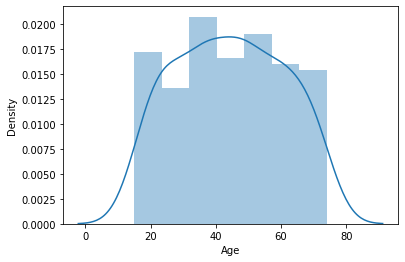

In [ ]:
sns.distplot(df['Age']);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


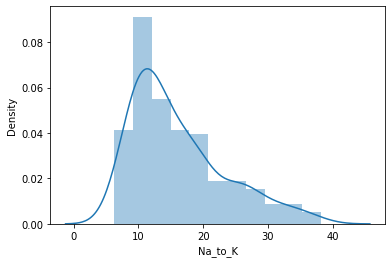

In [ ]:
sns.distplot(df['Na_to_K']);

👉The distribution of **'Age'** column is **symetric**, since the skewness value  between -0.5 and 0.5 <br>
👉The distribution of **'Na_to_K'** column is **moderately skewed**, since the skewness value is ***between 0.5 and 1***. It can also be seen from the histogram for 'Na_to_K' column

# 5. Univariate Analysis
This section will explore variables in the dataset using different various plots/charts.

## 5.1 Drug Type Distribution 💊

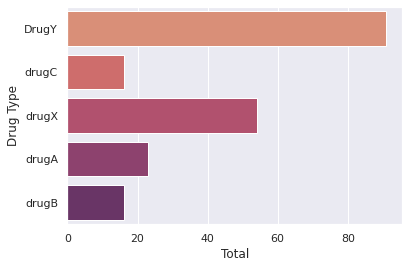

In [ ]:
sns.set_theme(style="darkgrid")
sns.countplot(y="Drug", data=df, palette="flare")
plt.ylabel('Drug Type')
plt.xlabel('Total')
plt.show()

## 5.2 Gender Distribution 👫

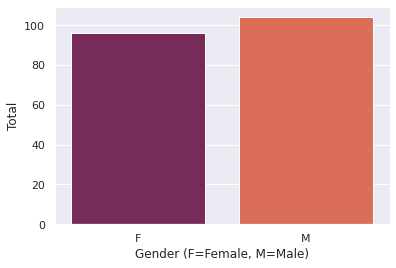

In [ ]:
sns.set_theme(style="darkgrid")
sns.countplot(x="Sex", data=df, palette="rocket")
plt.xlabel('Gender (F=Female, M=Male)')
plt.ylabel('Total')
plt.show()

## 5.3 Blood Pressure Distribution 🩸

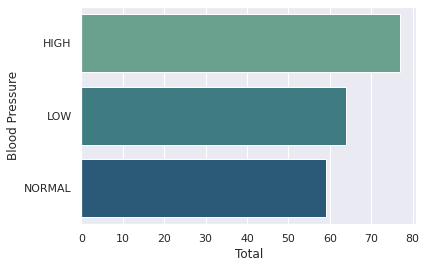

In [ ]:
sns.set_theme(style="darkgrid")
sns.countplot(y="BP", data=df, palette="crest")
plt.ylabel('Blood Pressure')
plt.xlabel('Total')
plt.show()

## 5.4 Cholesterol Distribution 🥛

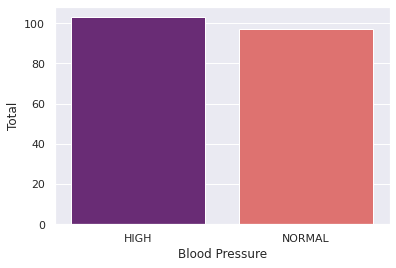

In [ ]:
sns.set_theme(style="darkgrid")
sns.countplot(x="Cholesterol", data=df, palette="magma")
plt.xlabel('Blood Pressure')
plt.ylabel('Total')
plt.show()

## 5.5 Gender Distribution based on Drug Type 👫💊

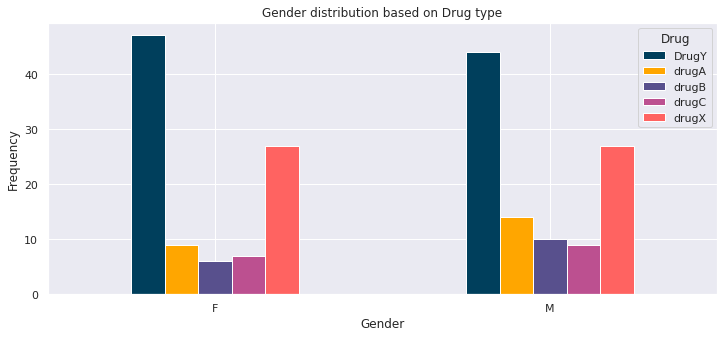

In [ ]:
pd.crosstab(df.Sex,df.Drug).plot(kind="bar",figsize=(12,5),color=['#003f5c','#ffa600','#58508d','#bc5090','#ff6361'])
plt.title('Gender distribution based on Drug type')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

## 5.6 Blood Pressure Distribution based on Cholesetrol 🩸🥛

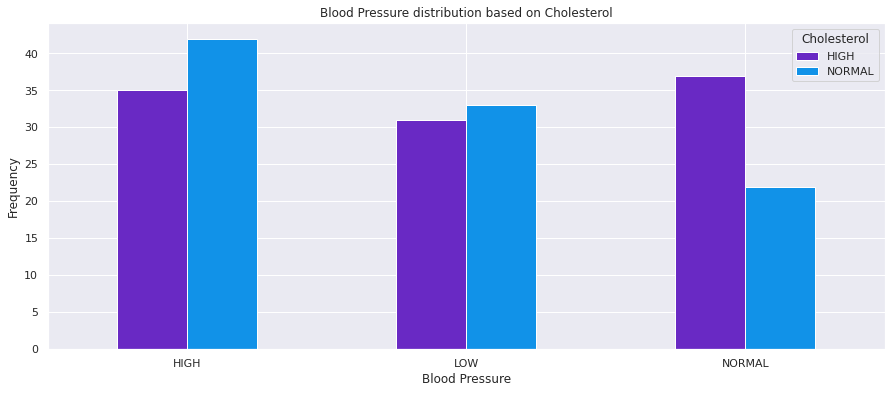

In [ ]:
pd.crosstab(df.BP,df.Cholesterol).plot(kind="bar",figsize=(15,6),color=['#6929c4','#1192e8'])
plt.title('Blood Pressure distribution based on Cholesterol')
plt.xlabel('Blood Pressure')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

## 5.7 Sodium to Potassium Distribution based on Gender and Age 🧪👫👴

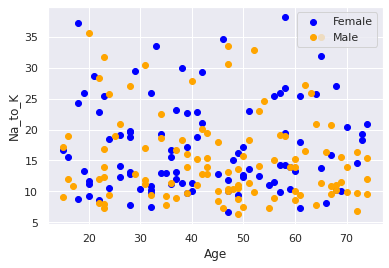

In [ ]:
plt.scatter(x=df.Age[df.Sex=='F'], y=df.Na_to_K[(df.Sex=='F')], c="Blue")
plt.scatter(x=df.Age[df.Sex=='M'], y=df.Na_to_K[(df.Sex=='M')], c="Orange")
plt.legend(["Female", "Male"])
plt.xlabel("Age")
plt.ylabel("Na_to_K")
plt.show()

# 6.Bivariate analysis

In [7]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


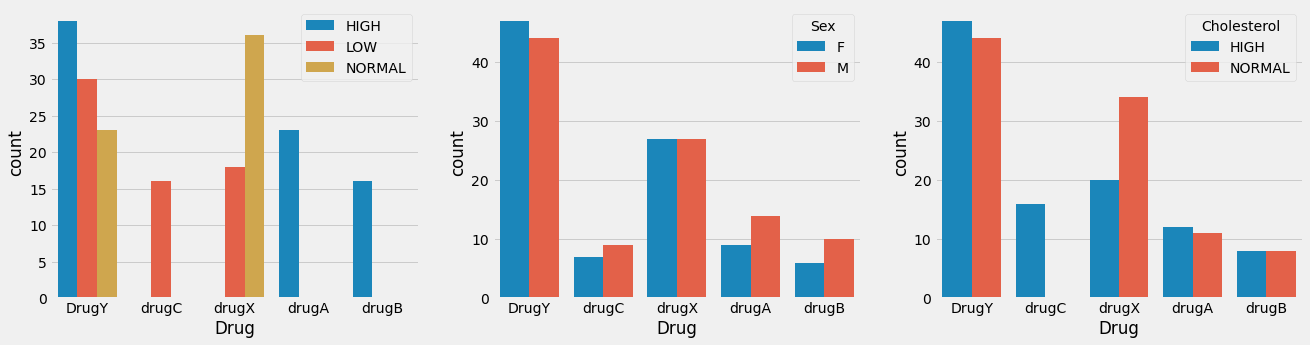

In [12]:
plt.figure(figsize=(20,5))
plt.subplot(131)
sns.countplot(df['Drug'],hue=df['BP'])
plt.legend(loc='upper right')
plt.subplot(132)
sns.countplot(df['Drug'],hue=df['Sex'])
plt.subplot(133)
sns.countplot(df['Drug'],hue=df['Cholesterol'])

In [ ]:
# Creating a new column Age_. This column shows the categorized age.

df['Age_'] = ['15-30' if x<=30 else '30-50' if x>30 and x<=50 else '50-75' for x in df['Age']]
df.head()

In [ ]:
# Finding the relation between categorized age and drug

pd.crosstab(df['Age_'],[df['Drug']])

In [ ]:
# Removing the Age_ column

df.drop('Age_',axis=1,inplace=True)
df.head()

# 7.Multivariate Analysis

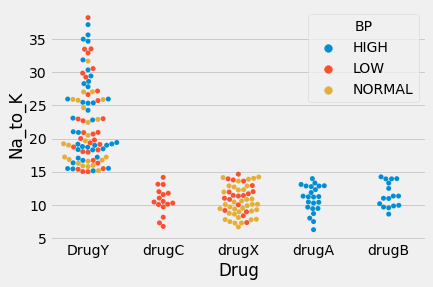

In [13]:
sns.swarmplot(df['Drug'],df['Na_to_K'],hue=df['BP'])

# DrugC is used for low BP patient, DrugY is used on patients having Na_to_K > 15.

# 8.Encoding- Converting categorical to numerical

In [14]:
# Replacing low, normal & high with 0, 1 & 2...

df['BP'] = [0 if x=='LOW' else 1 if x=='NORMAL' else 2 for x in df['BP']]

In [15]:
# Replacing normal and high cholesterol with 0 & 1

df['Cholesterol'] = [0 if x=='NORMAL' else 1 for x in df['Cholesterol']]

In [16]:
# Replacing female and male with 0 & 1

df['Sex'] = [0 if x=='F' else 1 for x in df['Sex']]

In [17]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,2,1,25.355,DrugY
1,47,1,0,1,13.093,drugC
2,47,1,0,1,10.114,drugC
3,28,0,1,1,7.798,drugX
4,61,0,0,1,18.043,DrugY


In [18]:
df['Drug'].value_counts()

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

In [19]:
x = df.drop('Drug',axis=1)
x.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,2,1,25.355
1,47,1,0,1,13.093
2,47,1,0,1,10.114
3,28,0,1,1,7.798
4,61,0,0,1,18.043


In [20]:
y = df['Drug']
y.head()

0    DrugY
1    drugC
2    drugC
3    drugX
4    DrugY
Name: Drug, dtype: object

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=10)

In [22]:
print('Shape of x_train {}'.format(x_train.shape))
print('Shape of y_train {}'.format(y_train.shape))
print('Shape of x_test {}'.format(x_test.shape))
print('Shape of y_test {}'.format(y_test.shape))

Shape of x_train (140, 5)
Shape of y_train (140,)
Shape of x_test (60, 5)
Shape of y_test (60,)


#9. Data Preparation ⚙
👉 This section will prepare the dataset before building the machine learning models.

## 9.1 Data Bining🚮

### 9.1.1 Age 👴
👉 The age will be divided into **7 age categories**:
*  Below 20 y.o.
*  20 - 29 y.o.
*  30 - 39 y.o.
*  40 - 49 y.o.
*  50 - 59 y.o.
*  60 - 69 y.o.
*  Above 70.

In [23]:
bin_age = [0, 19, 29, 39, 49, 59, 69, 80]
category_age = ['<20s', '20s', '30s', '40s', '50s', '60s', '>60s']
df['Age_binned'] = pd.cut(df['Age'], bins=bin_age, labels=category_age)
df = df.drop(['Age'], axis = 1)

### 9.1.2 Na_to_K 🧪
👉 The chemical ratio will be divided into **4 categories**:
*  Below 10.
*  10 - 20.
*  20 - 30.
*  Above 30.

In [24]:
bin_NatoK = [0, 9, 19, 29, 50]
category_NatoK = ['<10', '10-20', '20-30', '>30']
df['Na_to_K_binned'] = pd.cut(df['Na_to_K'], bins=bin_NatoK, labels=category_NatoK)
df = df.drop(['Na_to_K'], axis = 1)

## 9.2 Splitting the dataset 🪓
👉 The dataset will be split into **70% training and 30% testing**.

In [25]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [26]:
X = df.drop(["Drug"], axis=1)
y = df["Drug"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

## 9.3 Feature Engineering 🔧
👉 The FE method that used is **one-hot encoding**, which is **transforming categorical variables into a form that could be provided to ML algorithms to do a better prediction**.

In [27]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [28]:
X_train.head()

,Sex,BP,Cholesterol,Age_binned_<20s,Age_binned_20s,Age_binned_30s,Age_binned_40s,Age_binned_50s,Age_binned_60s,Age_binned_>60s,Na_to_K_binned_<10,Na_to_K_binned_10-20,Na_to_K_binned_20-30,Na_to_K_binned_>30
131,1,0,0,0,0,0,0,1,0,0,0,0,0,1
96,0,0,1,0,0,0,0,1,0,0,0,0,0,1
181,0,1,1,0,0,0,0,1,0,0,0,1,0,0
19,0,2,0,0,0,1,0,0,0,0,0,0,1,0
153,0,0,0,0,0,0,0,0,0,1,0,1,0,0


In [29]:
X_test.head()

,Sex,BP,Cholesterol,Age_binned_<20s,Age_binned_20s,Age_binned_30s,Age_binned_40s,Age_binned_50s,Age_binned_60s,Age_binned_>60s,Na_to_K_binned_<10,Na_to_K_binned_10-20,Na_to_K_binned_20-30,Na_to_K_binned_>30
18,1,0,1,0,1,0,0,0,0,0,1,0,0,0
170,0,1,1,0,1,0,0,0,0,0,0,1,0,0
107,1,0,1,0,0,0,1,0,0,0,0,0,1,0
98,1,2,0,0,1,0,0,0,0,0,0,0,0,1
177,1,1,1,0,1,0,0,0,0,0,0,0,1,0


👉 As can be seen, the distrubtion of drug type are now balanced.

# 10. Model Building 

## 10.1 Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression
LRclassifier = LogisticRegression(solver='liblinear', max_iter=5000)
LRclassifier.fit(X_train, y_train)

y_pred = LRclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
LRAcc = accuracy_score(y_pred,y_test)
print('Logistic Regression accuracy is: {:.2f}%'.format(LRAcc*100))

              precision    recall  f1-score   support

       DrugY       0.77      0.80      0.79        30
       drugA       0.50      0.60      0.55         5
       drugB       0.67      0.67      0.67         3
       drugC       0.50      0.25      0.33         4
       drugX       0.72      0.72      0.72        18

    accuracy                           0.72        60
   macro avg       0.63      0.61      0.61        60
weighted avg       0.71      0.72      0.71        60

[[24  2  1  1  2]
 [ 2  3  0  0  0]
 [ 1  0  2  0  0]
 [ 0  0  0  1  3]
 [ 4  1  0  0 13]]
Logistic Regression accuracy is: 71.67%


## 10.2 K-Nearest Neighbours

In [31]:
from sklearn.neighbors import KNeighborsClassifier
KNclassifier = KNeighborsClassifier(n_neighbors=20)
KNclassifier.fit(X_train, y_train)

y_pred = KNclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
KNAcc = accuracy_score(y_pred,y_test)
print('K Neighbours accuracy is: {:.2f}%'.format(KNAcc*100))

              precision    recall  f1-score   support

       DrugY       0.72      0.77      0.74        30
       drugA       0.50      0.20      0.29         5
       drugB       0.50      0.33      0.40         3
       drugC       0.00      0.00      0.00         4
       drugX       0.78      1.00      0.88        18

    accuracy                           0.72        60
   macro avg       0.50      0.46      0.46        60
weighted avg       0.66      0.72      0.68        60

[[23  1  1  1  4]
 [ 4  1  0  0  0]
 [ 2  0  1  0  0]
 [ 3  0  0  0  1]
 [ 0  0  0  0 18]]
K Neighbours accuracy is: 71.67%


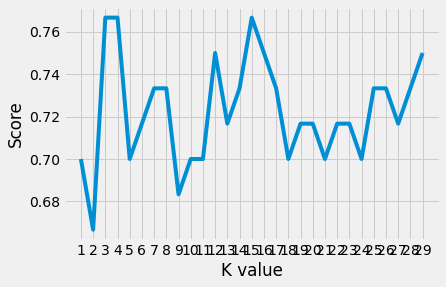

KNN Acc Max 76.67%


In [32]:
scoreListknn = []
for i in range(1,30):
    KNclassifier = KNeighborsClassifier(n_neighbors = i)
    KNclassifier.fit(X_train, y_train)
    scoreListknn.append(KNclassifier.score(X_test, y_test))
    
plt.plot(range(1,30), scoreListknn)
plt.xticks(np.arange(1,30,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()
KNAccMax = max(scoreListknn)
print("KNN Acc Max {:.2f}%".format(KNAccMax*100))

## 10.3 Naive Bayes Classifier


In [33]:
from sklearn.naive_bayes import CategoricalNB
NBclassifier1 = CategoricalNB()
NBclassifier1.fit(X_train, y_train)

y_pred = NBclassifier1.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
NBAcc1 = accuracy_score(y_pred,y_test)
print('Naive Bayes accuracy is: {:.2f}%'.format(NBAcc1*100))

              precision    recall  f1-score   support

       DrugY       1.00      0.70      0.82        30
       drugA       0.71      1.00      0.83         5
       drugB       0.75      1.00      0.86         3
       drugC       0.50      0.50      0.50         4
       drugX       0.75      1.00      0.86        18

    accuracy                           0.82        60
   macro avg       0.74      0.84      0.77        60
weighted avg       0.86      0.82      0.81        60

[[21  2  1  2  4]
 [ 0  5  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  2  2]
 [ 0  0  0  0 18]]
Naive Bayes accuracy is: 81.67%


## 10.4 Decision Tree Making

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DTclassifier = DecisionTreeClassifier(max_leaf_nodes=20)
DTclassifier.fit(X_train, y_train)

y_pred = DTclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
DTAcc = accuracy_score(y_pred,y_test)
print('Decision Tree accuracy is: {:.2f}%'.format(DTAcc*100))

              precision    recall  f1-score   support

       DrugY       0.90      0.60      0.72        30
       drugA       0.50      1.00      0.67         5
       drugB       0.75      1.00      0.86         3
       drugC       0.67      1.00      0.80         4
       drugX       0.80      0.89      0.84        18

    accuracy                           0.77        60
   macro avg       0.72      0.90      0.78        60
weighted avg       0.81      0.77      0.76        60

[[18  5  1  2  4]
 [ 0  5  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  4  0]
 [ 2  0  0  0 16]]
Decision Tree accuracy is: 76.67%


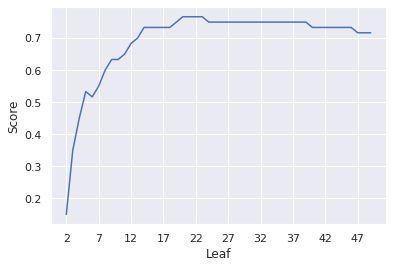

DT Acc Max 76.67%


In [ ]:
scoreListDT = []
for i in range(2,50):
    DTclassifier = DecisionTreeClassifier(max_leaf_nodes=i)
    DTclassifier.fit(X_train, y_train)
    scoreListDT.append(DTclassifier.score(X_test, y_test))
    
plt.plot(range(2,50), scoreListDT)
plt.xticks(np.arange(2,50,5))
plt.xlabel("Leaf")
plt.ylabel("Score")
plt.show()
DTAccMax = max(scoreListDT)
print("DT Acc Max {:.2f}%".format(DTAccMax*100))

## 10.5 Random Forest Classifier





In [ ]:
from sklearn.ensemble import RandomForestClassifier

RFclassifier = RandomForestClassifier(max_leaf_nodes=30)
RFclassifier.fit(X_train, y_train)

y_pred = RFclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
RFAcc = accuracy_score(y_pred,y_test)
print('Random Forest accuracy is: {:.2f}%'.format(RFAcc*100))

              precision    recall  f1-score   support

       DrugY       1.00      0.67      0.80        30
       drugA       0.62      1.00      0.77         5
       drugB       0.75      1.00      0.86         3
       drugC       0.67      1.00      0.80         4
       drugX       0.82      1.00      0.90        18

    accuracy                           0.83        60
   macro avg       0.77      0.93      0.83        60
weighted avg       0.88      0.83      0.83        60

[[20  3  1  2  4]
 [ 0  5  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  4  0]
 [ 0  0  0  0 18]]
Random Forest accuracy is: 83.33%


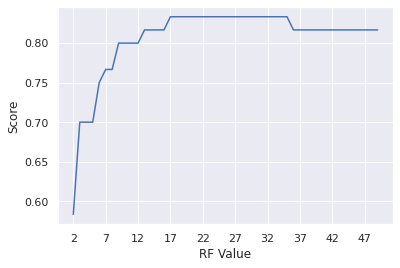

RF Acc Max 83.33%


In [ ]:
scoreListRF = []
for i in range(2,50):
    RFclassifier = RandomForestClassifier(n_estimators = 1000, random_state = 1, max_leaf_nodes=i)
    RFclassifier.fit(X_train, y_train)
    scoreListRF.append(RFclassifier.score(X_test, y_test))
    
plt.plot(range(2,50), scoreListRF)
plt.xticks(np.arange(2,50,5))
plt.xlabel("RF Value")
plt.ylabel("Score")
plt.show()
RFAccMax = max(scoreListRF)
print("RF Acc Max {:.2f}%".format(RFAccMax*100))

In [34]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [35]:
ypred = rf.predict(x_test)

In [36]:
confusion_matrix(y_test,ypred)

array([[18,  1,  2,  2,  7],
       [ 0,  0,  1,  0,  4],
       [ 2,  1,  0,  0,  0],
       [ 2,  0,  0,  0,  2],
       [12,  0,  3,  0,  3]])

In [37]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

       DrugY       0.53      0.60      0.56        30
       drugA       0.00      0.00      0.00         5
       drugB       0.00      0.00      0.00         3
       drugC       0.00      0.00      0.00         4
       drugX       0.19      0.17      0.18        18

    accuracy                           0.35        60
   macro avg       0.14      0.15      0.15        60
weighted avg       0.32      0.35      0.33        60



# 11. Model Evaluation and comparison 👀

In [ ]:
compare = pd.DataFrame({'Model': ['Logistic Regression', 'K Neighbors', 'K Neighbors Max', 'SVM', 'Categorical NB', 'Gaussian NB', 'Decision Tree', 'Decision Tree Max', 'Random Forest', 'Random Forest Max'], 
                        'Accuracy': [LRAcc*100, KNAcc*100, KNAccMax*100, SVCAcc*100, NBAcc1*100, NBAcc2*100, DTAcc*100, DTAccMax*100, RFAcc*100, RFAccMax*100]})
compare.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
0,Logistic Regression,83.333333
4,Categorical NB,83.333333
8,Random Forest,83.333333
9,Random Forest Max,83.333333
3,SVM,80.000000
6,Decision Tree,76.666667
7,Decision Tree Max,76.666667
2,K Neighbors Max,71.666667
5,Gaussian NB,70.000000
1,K Neighbors,65.000000


👉 From the results, it can be seen that most of ML models can reach **up to 80% accuracy** in predicting classification of drug type.

# 12. Saving the model
👉 The next step is to save the model in pickle format.

In [38]:
pickle.dump(rf,open('model.pkl','wb'))